# LinearRegression
linear Regression is good for predicting continuous-valued outcomes (such as the weight of a person in kg, the amount of rainfall in cm).

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston = pd.DataFrame(data = boston_dataset.data,columns = boston_dataset.feature_names)

In [27]:
boston.groupby('ZN').size()

ZN
0.0      372
12.5      10
17.5       1
18.0       1
20.0      21
21.0       4
22.0      10
25.0      10
28.0       3
30.0       6
33.0       4
34.0       3
35.0       3
40.0       7
45.0       6
52.5       3
55.0       3
60.0       4
70.0       3
75.0       3
80.0      15
82.5       2
85.0       2
90.0       5
95.0       4
100.0      1
dtype: int64

In [8]:
boston['MEDV'] = boston_dataset.target

In [9]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

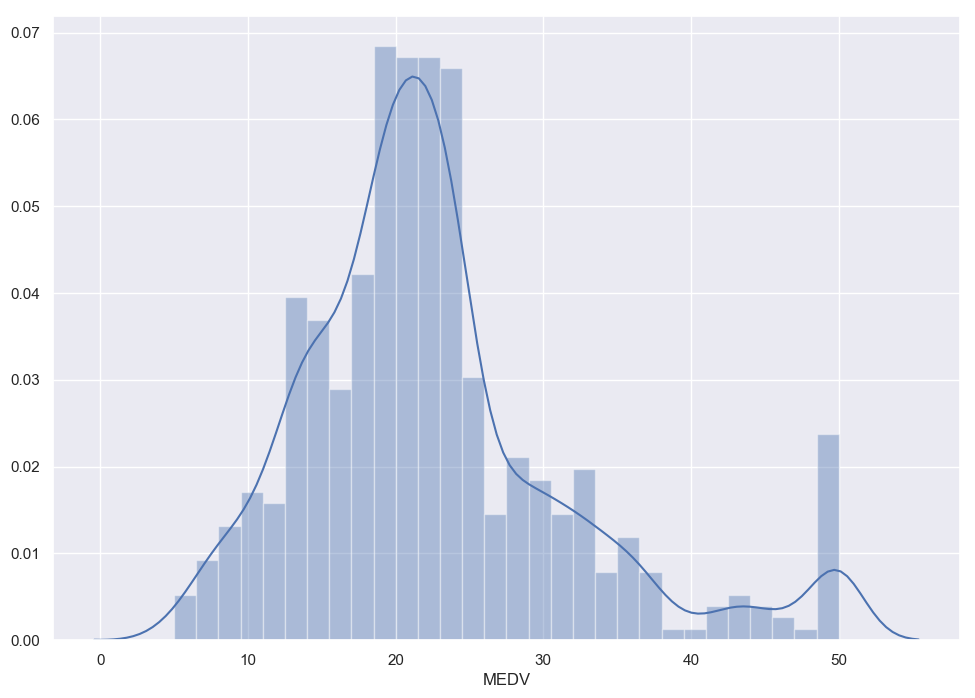

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27),'figure.dpi':100})
sns.distplot(boston['MEDV'], bins=30)

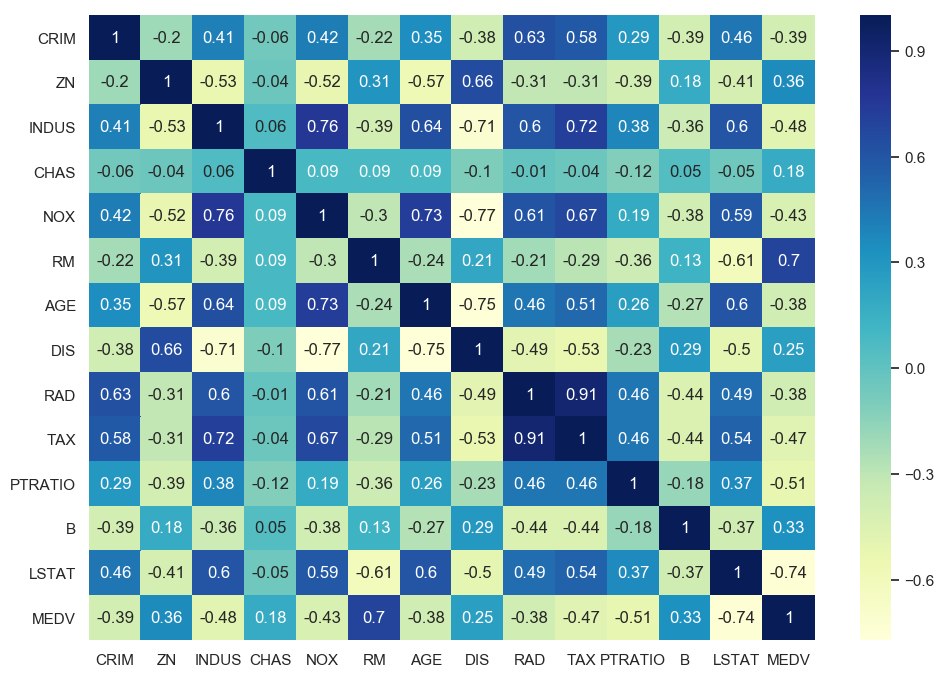

In [11]:
sns.heatmap(boston.corr().round(2),annot = True,cmap= 'YlGnBu' )

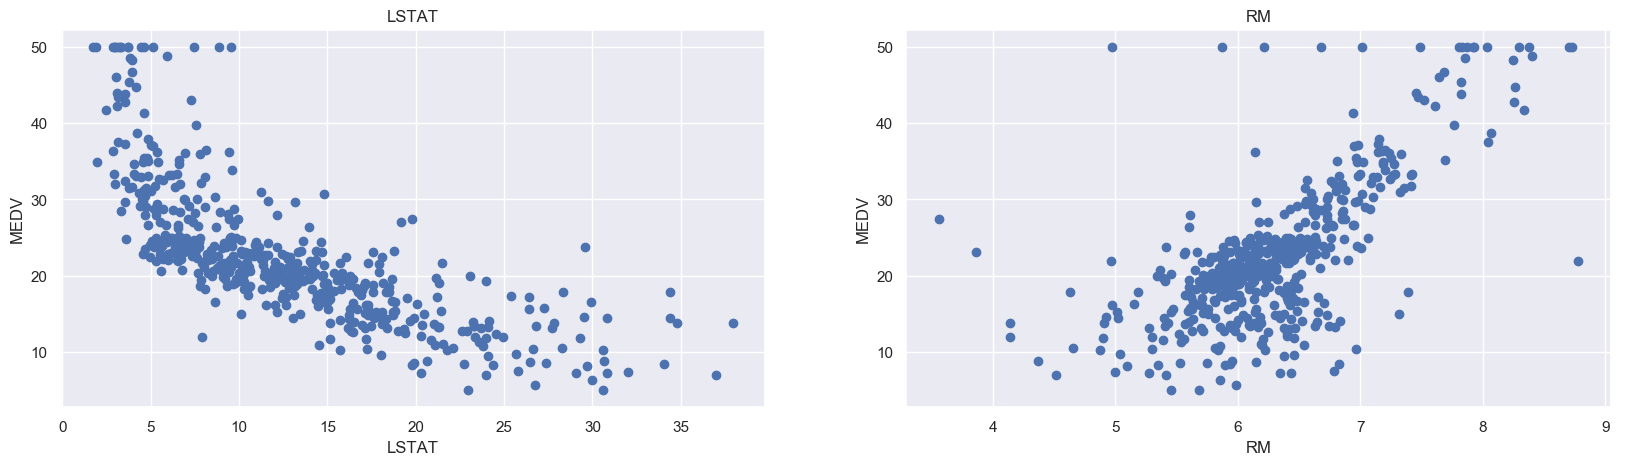

In [12]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [13]:
i, col = enumerate(features)

In [14]:
i

(0, 'LSTAT')

In [15]:
col

(1, 'RM')

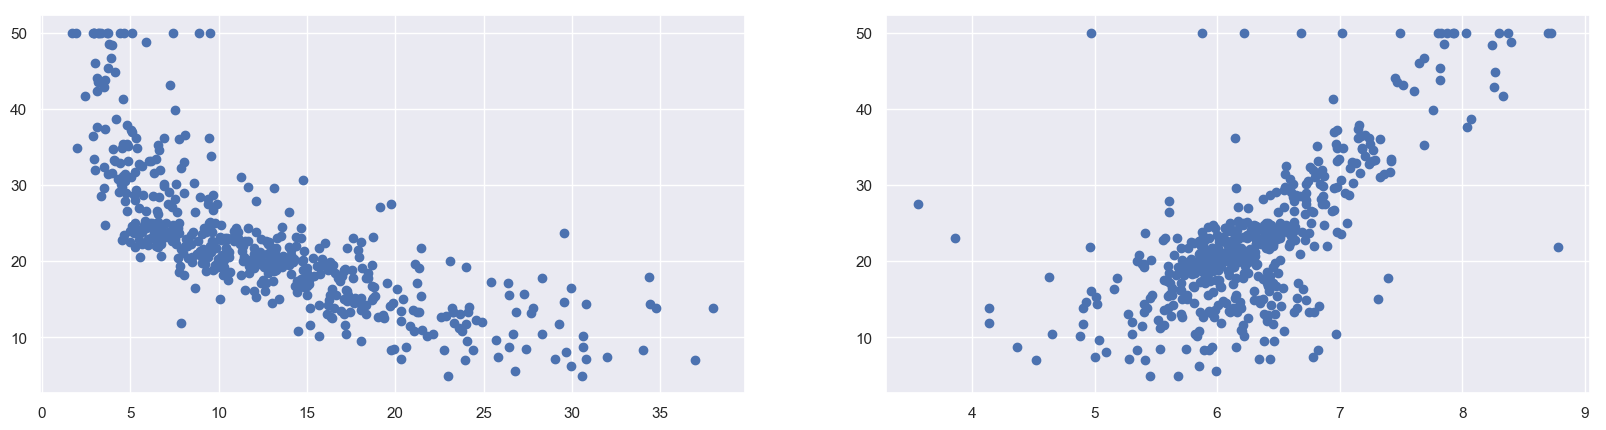

In [16]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.scatter(boston['LSTAT'],boston['MEDV'],marker='o')

plt.subplot(1,2,2)
plt.scatter(boston['RM'],boston['MEDV'],marker='o')

In [17]:
# X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
X=boston.drop('MEDV',axis = 1)
Y = boston['MEDV']

In [18]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [19]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.741000992236517
R2 score is 0.7383393920590519


The model performance for testing set
--------------------------------------
RMSE is 4.568292042303176
R2 score is 0.7334492147453113


In [21]:
lin_model.coef_

array([-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,  2.70536624e+00,
       -1.59570504e+01,  3.41397332e+00,  1.11887670e-03, -1.49308124e+00,
        3.64422378e-01, -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
       -5.94076089e-01])

In [22]:
lin_model.intercept_

37.91248700975083

In [23]:
coeff = pd.DataFrame(lin_model.coef_,X.columns,columns = ['Coeff'])

In [24]:
coeff

,Coeff
CRIM,-0.130800
ZN,0.049403
INDUS,0.001095
CHAS,2.705366
NOX,-15.957050
RM,3.413973
AGE,0.001119
DIS,-1.493081
RAD,0.364422
TAX,-0.013172


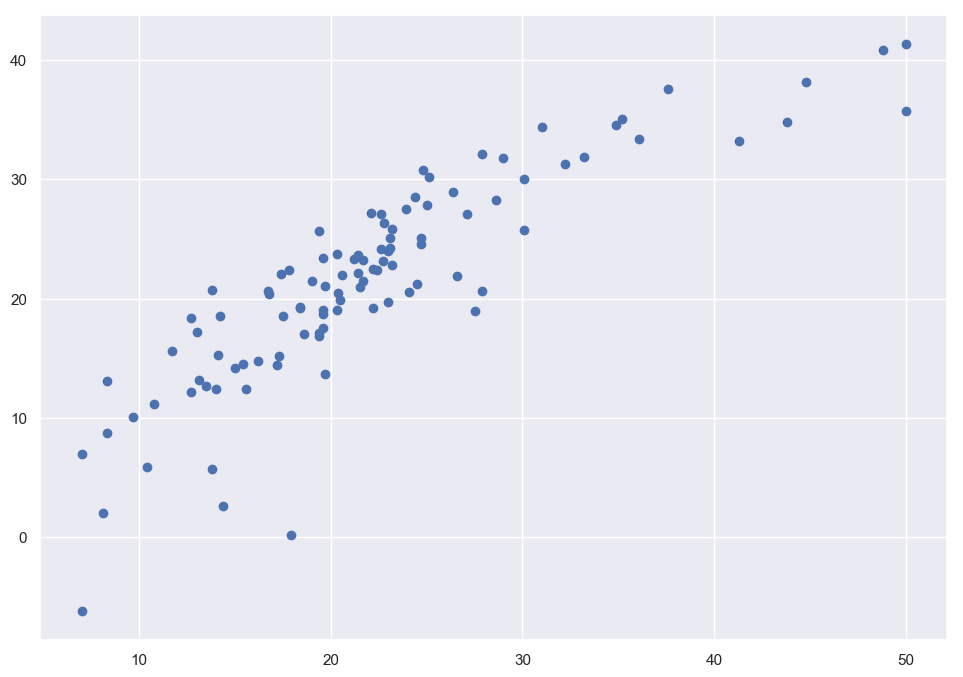

In [25]:
plt.scatter(Y_test, y_test_predict)

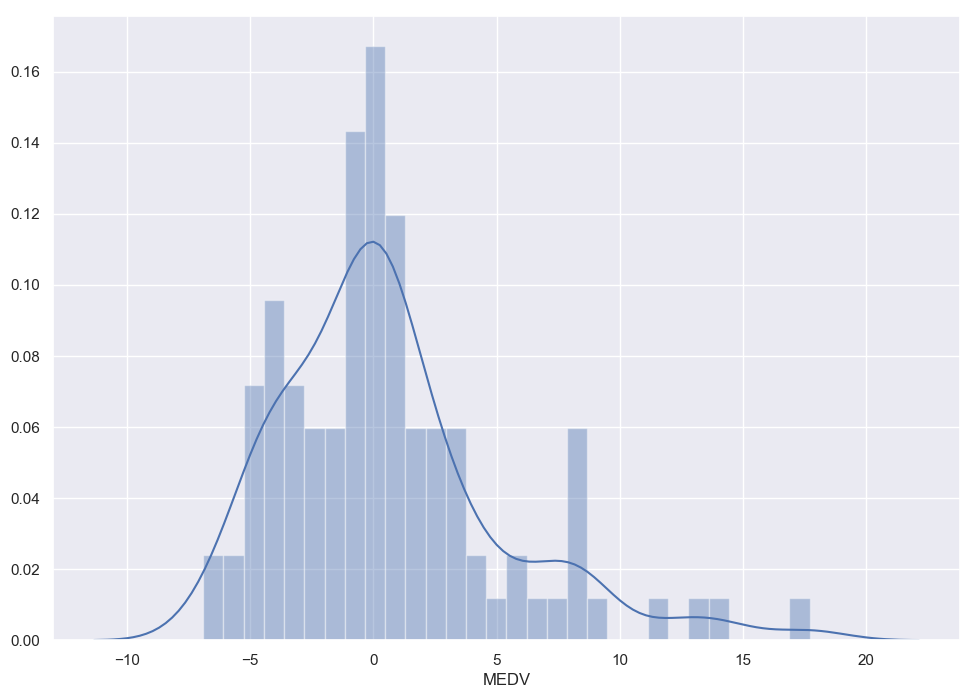

In [26]:
#CHecking Normal Distribution for deviation 
sns.distplot((Y_test-y_test_predict), bins = 30)